# Observing reconstruction images sequences (video image) by Encoder/Decoder based on Convolutional LSTM(ConvLSTM).

This notebook demonstrates that the Encoder/Decoder based on Convolutional LSTM(ConvLSTM) can learn images and reconstruct its. Image data set for this demo is about [Tennis player's motion](https://lmb.informatik.uni-freiburg.de/Publications/2011/Bro11a/)
.

Firstly, import Python and Cython modules for building the Encoder/Decoder based on Convolutional LSTM(ConvLSTM).

In [1]:
from pydbm.rnn.lstmmodel.conv_lstm_model import ConvLSTMModel
from pydbm.cnn.featuregenerator.image_generator import ImageGenerator

In [2]:
# LSTM Graph which is-a `Synapse`.
from pydbm.synapse.recurrenttemporalgraph.lstm_graph import LSTMGraph
# Polymorphism.
from pydbm.synapse.recurrenttemporalgraph.lstm_graph import LSTMGraph as EncoderGraph
from pydbm.synapse.recurrenttemporalgraph.lstm_graph import LSTMGraph as DecoderGraph

# Loss function.
from pydbm.loss.mean_squared_error import MeanSquaredError
# SGD as a Loss function.
from pydbm.optimization.optparams.sgd import SGD
# Adam as a Loss function.
from pydbm.optimization.optparams.adam import Adam as EncoderAdam
from pydbm.optimization.optparams.adam import Adam as DecoderAdam
# Verification.
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation
# LSTM model.
from pydbm.rnn.lstm_model import LSTMModel
# Polymorphism.
from pydbm.rnn.lstm_model import LSTMModel as Encoder
from pydbm.rnn.lstm_model import LSTMModel as Decoder
# Logistic Function as activation function.
from pydbm.activation.logistic_function import LogisticFunction
# Tanh Function as activation function.
from pydbm.activation.tanh_function import TanhFunction
# Encoder/Decoder
from pydbm.rnn.encoder_decoder_controller import EncoderDecoderController

In [3]:
from pydbm.activation.relu_function import ReLuFunction
from pydbm.activation.tanh_function import TanhFunction
from pydbm.activation.logistic_function import LogisticFunction
from pydbm.loss.mean_squared_error import MeanSquaredError
from pydbm.optimization.optparams.adam import Adam

In [4]:
from pydbm.synapse.recurrenttemporalgraph.lstm_graph import LSTMGraph

In [5]:
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation

Set hyperparameters of feature points in image data.

In [6]:
batch_size = 10
seq_len = 5
channel = 1
height = 100
width = 100
scale = 0.1

Instantiate objects and call the method.

In [7]:
from logging import getLogger, StreamHandler, NullHandler, DEBUG, ERROR

logger = getLogger("pydbm")
handler = StreamHandler()
handler.setLevel(DEBUG)
logger.setLevel(DEBUG)
logger.addHandler(handler)

In [8]:
feature_generator = ImageGenerator(
    epochs=100,
    batch_size=batch_size,
    training_image_dir="../demo_local/img/training/",
    test_image_dir="../demo_local/img/test/",
    seq_len=seq_len,
    gray_scale_flag=True,
    wh_size_tuple=(height, width),
    norm_mode="z_score"
)

Execute learning.

In [9]:
encoder_lstm_graph = LSTMGraph()
encoder_lstm_graph.observed_activating_function = TanhFunction()
encoder_lstm_graph.input_gate_activating_function = LogisticFunction()
encoder_lstm_graph.forget_gate_activating_function = LogisticFunction()
encoder_lstm_graph.output_gate_activating_function = LogisticFunction()
encoder_lstm_graph.hidden_activating_function = TanhFunction()
encoder_lstm_graph.output_activating_function = TanhFunction()

# Initialization strategy.
# This method initialize each weight matrices and biases in Gaussian distribution: `np.random.normal(size=hoge) * 0.01`.
encoder_lstm_graph.create_rnn_cells(
    input_neuron_count=100,
    hidden_neuron_count=500,
    output_neuron_count=100
)

encoder_conv_lstm_model = ConvLSTMModel(
    graph=encoder_lstm_graph,
    epochs=100,
    batch_size=batch_size,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=10,
    computable_loss=MeanSquaredError(),
    opt_params=Adam(),
    verificatable_result=VerificateFunctionApproximation(),
    filter_num=batch_size,
    channel=channel,
    #pad=2,
    #pool_width=1,
    #pool_height=1
)

decoder_lstm_graph = LSTMGraph()
decoder_lstm_graph.observed_activating_function = TanhFunction()
decoder_lstm_graph.input_gate_activating_function = LogisticFunction()
decoder_lstm_graph.forget_gate_activating_function = LogisticFunction()
decoder_lstm_graph.output_gate_activating_function = LogisticFunction()
decoder_lstm_graph.hidden_activating_function = TanhFunction()
decoder_lstm_graph.output_activating_function = TanhFunction()

# Initialization strategy.
# This method initialize each weight matrices and biases in Gaussian distribution: `np.random.normal(size=hoge) * 0.01`.
decoder_lstm_graph.create_rnn_cells(
    input_neuron_count=500,
    hidden_neuron_count=100,
    output_neuron_count=500
)

decoder_conv_lstm_model = ConvLSTMModel(
    graph=decoder_lstm_graph,
    epochs=100,
    batch_size=batch_size,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=10,
    computable_loss=MeanSquaredError(),
    opt_params=Adam(),
    verificatable_result=VerificateFunctionApproximation(),
    filter_num=batch_size,
    channel=batch_size,
    #pad=2,
    #pool_width=1,
    #pool_height=1
)



In [10]:
encoder_decoder_controller = EncoderDecoderController(
    encoder=encoder_conv_lstm_model,
    decoder=decoder_conv_lstm_model,
    epochs=100,
    batch_size=100,
    learning_rate=1e-05,
    learning_attenuate_rate=0.1,
    attenuate_epoch=50,
    test_size_rate=0.3,
    computable_loss=MeanSquaredError(),
    verificatable_result=VerificateFunctionApproximation(),
    tol=0.0
)

In [11]:
encoder_decoder_controller.learn_generated(feature_generator)

Generate training data: (10, 5, 1, 100, 100)
Generate test data: (10, 5, 1, 100, 100)
Best params are updated.
Epoch: 1
Loss: 
Training: 1.05536959743 Test: 1.05967891213
Generate training data: (10, 5, 1, 100, 100)
Generate test data: (10, 5, 1, 100, 100)
Epoch: 2
Loss: 
Training: 1.05702386613 Test: 1.04692141948
Generate training data: (10, 5, 1, 100, 100)
Generate test data: (10, 5, 1, 100, 100)
Epoch: 3
Loss: 
Training: 1.05655242122 Test: 1.05372511083
Generate training data: (10, 5, 1, 100, 100)
Generate test data: (10, 5, 1, 100, 100)
Best params are updated.
Epoch: 4
Loss: 
Training: 1.04696202241 Test: 1.05806028719
Generate training data: (10, 5, 1, 100, 100)
Generate test data: (10, 5, 1, 100, 100)
Best params are updated.
Epoch: 5
Loss: 
Training: 1.04185337694 Test: 1.04950433762
Generate training data: (10, 5, 1, 100, 100)
Generate test data: (10, 5, 1, 100, 100)
Epoch: 6
Loss: 
Training: 1.05027822879 Test: 1.06038424904
Generate training data: (10, 5, 1, 100, 100)
Gene

# Extract reconstruction images.

The object `encoder_decoder_controller` which is-a `EncoderDecoderController` has a method `inference` to be able to reconstruct observed data points as feature points. The input test data and reconstructed data are as follows.

Generate training data: (10, 5, 1, 100, 100)
Generate test data: (10, 5, 1, 100, 100)


test data:


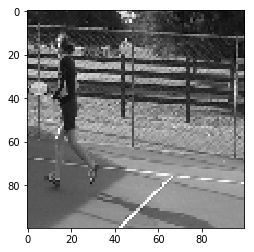

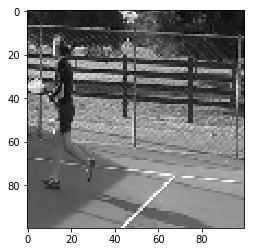

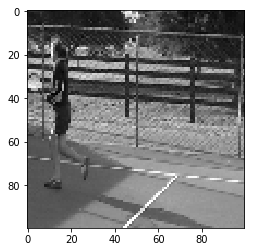

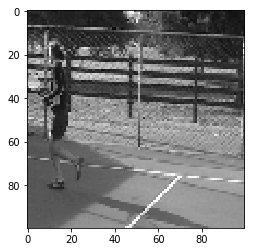

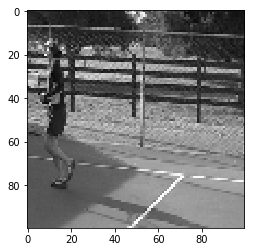

reconstructed data:


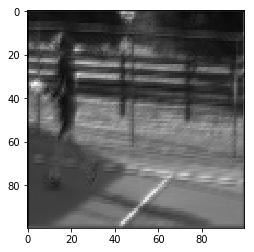

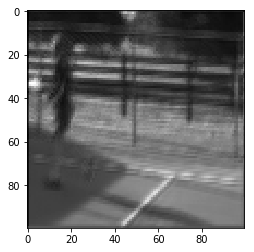

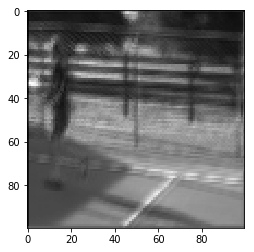

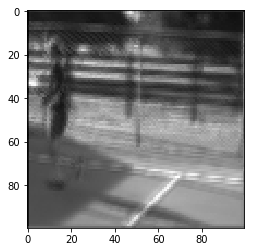

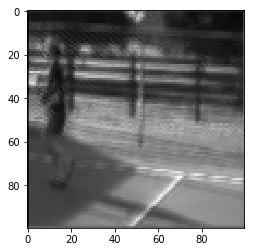

test data:


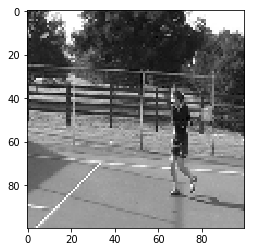

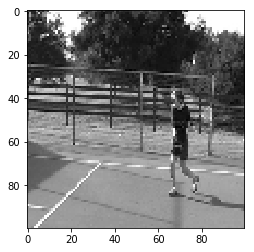

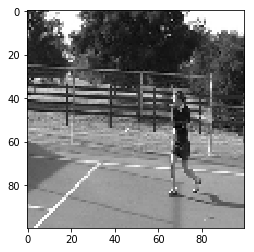

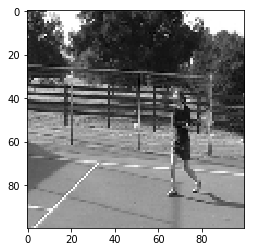

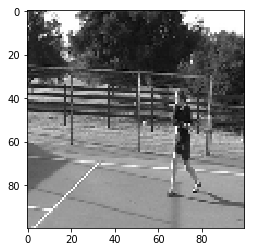

reconstructed data:


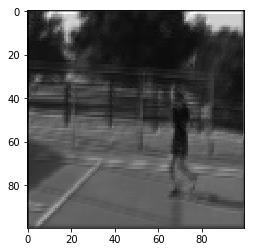

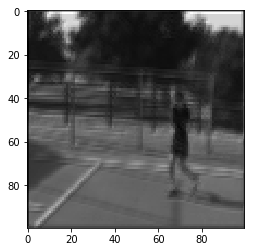

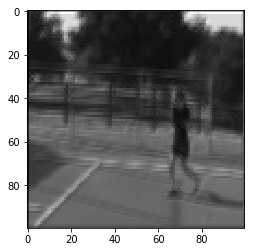

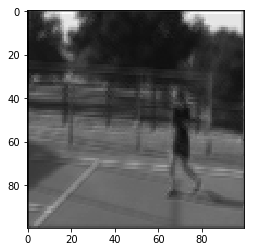

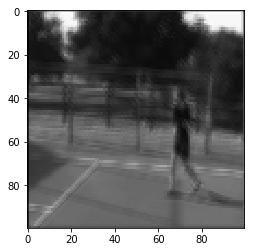

test data:


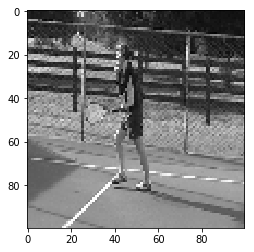

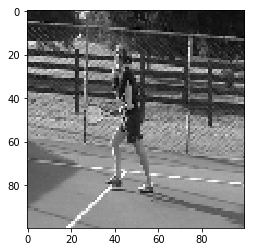

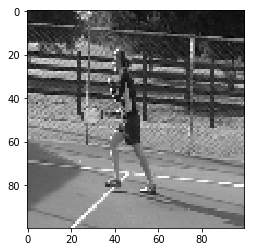

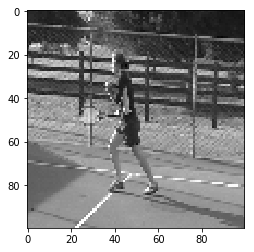

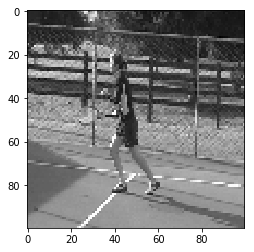

reconstructed data:


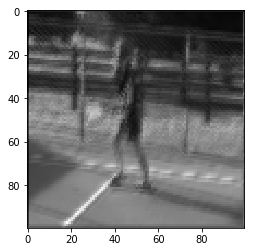

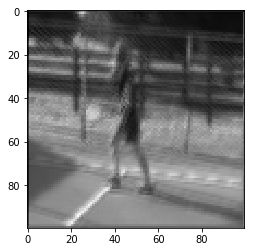

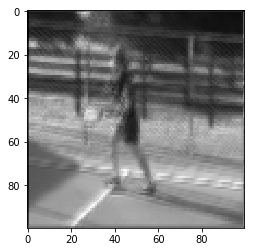

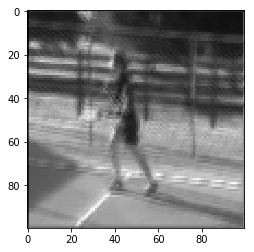

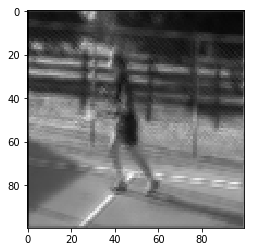

In [13]:
import matplotlib.pyplot as plt

test_len = 0
test_limit = 3

for batch_observed_arr, batch_target_arr, test_batch_observed_arr, test_batch_target_arr in feature_generator.generate():
    result_arr = encoder_decoder_controller.inference(test_batch_observed_arr)
    for batch in range(test_batch_target_arr.shape[0]):
        test_len += 1
        print("test data:")
        for seq in range(test_batch_target_arr[batch].shape[0]):
            plt.imshow(test_batch_target_arr[batch][seq][0], cmap="gray")
            plt.show()
            plt.close()
        print("reconstructed data:")
        for seq in range(test_batch_target_arr[batch].shape[0]):
            plt.imshow(result_arr[batch][seq][0], cmap="gray")
            plt.show()
            plt.close()
        if test_len >= test_limit:
            break
    if test_len >= test_limit:
        break


# References

- Brox, T., & Malik, J. (2011). Large displacement optical flow: descriptor matching in variational motion estimation. IEEE transactions on pattern analysis and machine intelligence, 33(3), 500-513.
- Xingjian, S. H. I., Chen, Z., Wang, H., Yeung, D. Y., Wong, W. K., & Woo, W. C. (2015). Convolutional LSTM network: A machine learning approach for precipitation nowcasting. In Advances in neural information processing systems (pp. 802-810).